# Pymaceuticals Inc.
---

### Analysis

1.Capomulin and Ramicane drug regimens results show the most significant reduction in tumor volume based on their lower mean and median values.
On the other side Placebo group has the highest mean and median tumor volumes, confirming their least effectiveness compared to the other drug regimens.

2.Capomulin and Ramicane drug regimens have lower variances and standard deviations, suggesting a more consistent response to the treatments. 

3.Capomulin and Ramicane drug regimens have lower SEMs, suggesting that their observed mean tumor volumes were more reliable.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID" )

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouce_count=mouse_metadata["Mouse ID"].nunique()
mouce_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique() 
duplicate_mice_id 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_id=combined_data[combined_data["Mouse ID"]=="g989"]
dup_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data.query('`Mouse ID` not in @duplicate_mice_id')
clean_df.head()
# The query method allows you to filter data using a string expression.
# The @ symbol is used to reference the dup_id list within the query.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice=clean_df["Mouse ID"].nunique()
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median() 
variance_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_deviation_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_statistical_df = pd.DataFrame({
                                        "Mean Tumor Volume": mean_volume,
                                        "Median Tumor Volume": median_volume,
                                        "Tumor Volume Variance": variance_volume,
                                        "Tumor Volume Std. Dev.": standard_deviation_volume,
                                        "Tumor Volume Std. Err.": sem_volume
                                    })
summary_statistical_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggregation = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median', 'var', 'std', 'sem'])
summary_statistics_aggregation


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

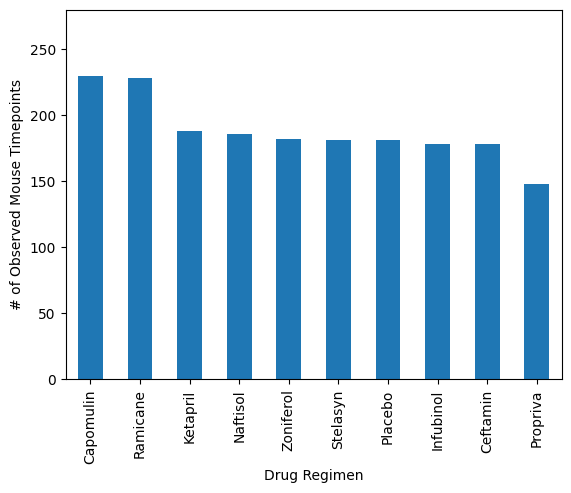

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = clean_df["Drug Regimen"].value_counts()
#mouse_count
mouse_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.ylim(0,max(mouse_count)+50)
plt.savefig("Observed_Mouse_Timepoints.png")
plt.show()

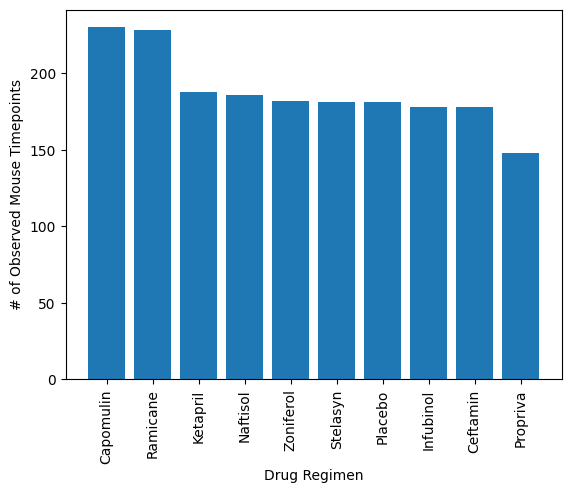

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis= mouse_count.index.values
y_axis = mouse_count.values

plt.bar(x_axis,y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.savefig("Observed_Mouse_Timepoints1.png")
plt.show()

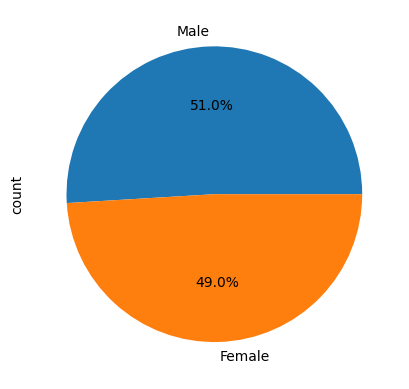

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
female_vs_male_count = clean_df["Sex"].value_counts()
female_vs_male_count.plot(kind ='pie', autopct='%1.1f%%') # Plotting as a pie chart with one decimal point in the percentages
plt.savefig("piechart_pandas.png")
plt.show()

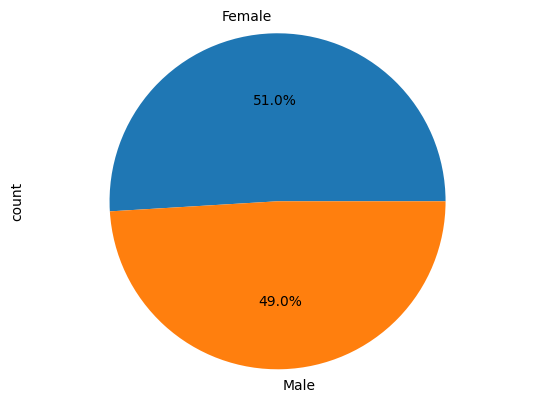

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

labels = ['Female', 'Male'] # Set the labels
plt.pie(female_vs_male_count,autopct = "%1.1f%%",labels = labels)
plt.axis('equal')
plt.ylabel('count')
plt.savefig("piechart_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
each_mouse_timepoint = combined_data.groupby(['Mouse ID']).max()['Timepoint']
each_mouse_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_regimen_df = pd.merge(each_mouse_timepoint,clean_df, on=("Mouse ID", "Timepoint"), how='left')
last_regimen_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45,70.717621,4.0,Placebo,Female,17.0,29.0
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30,63.440686,1.0,Stelasyn,Female,16.0,29.0
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0.0,Propriva,Female,12.0,26.0
245,z578,45,30.638696,0.0,Ramicane,Male,11.0,16.0
246,z581,45,62.754451,3.0,Infubinol,Female,24.0,25.0
247,z795,45,65.741070,3.0,Naftisol,Female,13.0,29.0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for regimen in labels:
    tumor_data = last_regimen_df.loc[last_regimen_df["Drug Regimen"]==regimen,'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
 
    quartiles = tumor_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"{regimen} potential outliers: {lower_bound:.2f} mm3 or above {upper_bound:.2f} mm3")    


Capomulin potential outliers: 20.70 mm3 or above 51.83 mm3
Ramicane potential outliers: 17.91 mm3 or above 54.31 mm3
Infubinol potential outliers: 36.83 mm3 or above 82.74 mm3
Ceftamin potential outliers: 25.36 mm3 or above 87.67 mm3


<function matplotlib.pyplot.show(close=None, block=None)>

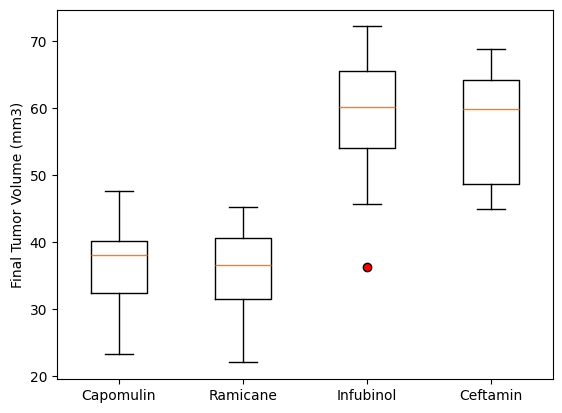

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red")
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
plt.boxplot(tumor_vol_data, labels = labels , flierprops = red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.savefig("tumor_volume.png")
plt.show

## Line and Scatter Plots

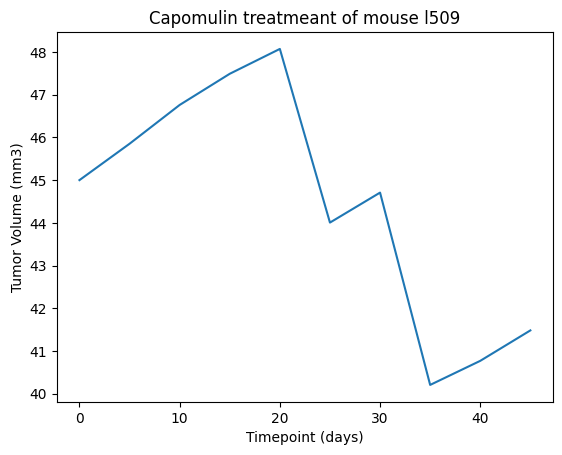

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = combined_data[combined_data["Mouse ID"]=="l509"]
line_plot.head()

x_axis = line_plot["Timepoint"]
tumor_vol = line_plot["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_vol)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('lineplotchart.png')
plt.show()


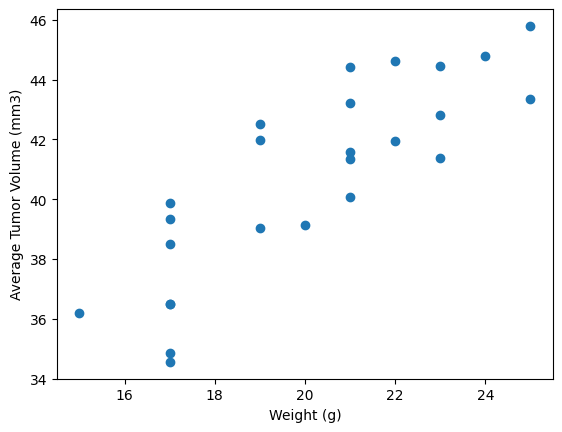

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("scatterplot.png")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


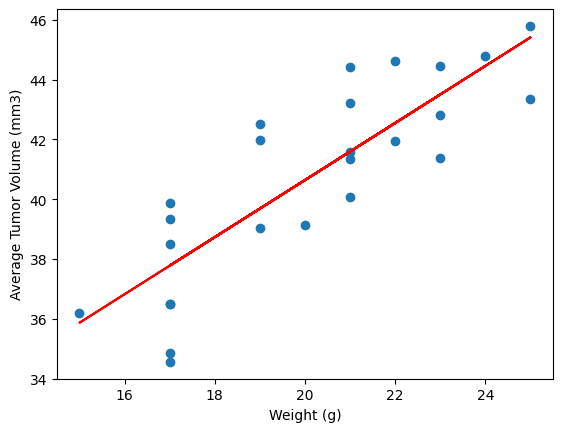

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff = round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr_coeff}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
values_for_formula = capomulin_average["Weight (g)"] * slope + intercept

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"], values_for_formula, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("corr_coeff_linear.png")
plt.show()
